In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

basedir = 'C:/Users/juned/Desktop/Juned/GreyAtom/capstone project/Data'
applaunched,appuninstalled ,registration , utmvisited,videodetails,videostarted = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
event_type = {'AppLaunched':1,'AppUninstalled':2,'Registration':3,'UTMVisited':4,'VideoDetails':5,'VideoStarted':6}

columns_list = []

for rec in os.listdir(basedir):
    tmp = pd.read_csv(basedir+'/'+rec)
    tmp.drop_duplicates(inplace=True)
    for col in tmp.columns:
        if col not in columns_list:
           columns_list.append(col)
    tmp['Date'] = pd.to_datetime(tmp['Date'],format='%Y%m%d')    
    if rec == 'AppLaunched.csv':
        tmp['event_type'] = event_type.get('AppLaunched')
        applaunched = tmp
    elif rec == 'AppUninstalled.csv':
        tmp['event_type'] = event_type.get('AppUninstalled')
        appuninstalled = tmp
    elif rec == 'Registration.csv':
        tmp['event_type'] = event_type.get('Registration')
        registration = tmp
    elif rec == 'UTMVisited.csv':
        tmp['event_type'] = event_type.get('UTMVisited')
        utmvisited = tmp
    elif rec == 'VideoDetails.csv':
        tmp['event_type'] = event_type.get('VideoDetails')
        videodetails = tmp
    elif rec == 'VideoStarted.csv': 
        tmp['event_type'] = event_type.get('VideoStarted')
        videostarted = tmp
        
    
data = pd.concat( [applaunched,appuninstalled,registration,utmvisited,videodetails,videostarted] , axis=0)
data['Date'] = pd.to_datetime(data['Date'],format='%Y%m%d')

In [2]:
#current_users = (set(registration.loc[(registration['Status'] =='Completed') | (registration['Status'] =='Complete') , 'UserId']) - set(appuninstalled['UserId']))

tmp_current_df = data.loc[ (data['event_type'].isin([2,3]) ) ].sort_values(['UserId','Date']).groupby('UserId')['UserId','event_type'].tail(1)
current_users = set(tmp_current_df.loc[tmp_current_df['event_type'] == 3,'UserId'])

print('List of users active ',len(current_users))

List of users active  91969


In [11]:
data.loc[ (data['UserId']=='4fcf3055c0e7ca17c0c487f45ad5baf2') & (data['event_type'].isin([2,3]) ),['UserId','Date','event_type']]

,UserId,Date,event_type
321879,4fcf3055c0e7ca17c0c487f45ad5baf2,2017-06-11,2
155696,4fcf3055c0e7ca17c0c487f45ad5baf2,2017-04-17,3
158557,4fcf3055c0e7ca17c0c487f45ad5baf2,2017-04-18,3
158729,4fcf3055c0e7ca17c0c487f45ad5baf2,2017-04-18,3
158790,4fcf3055c0e7ca17c0c487f45ad5baf2,2017-04-18,3
159177,4fcf3055c0e7ca17c0c487f45ad5baf2,2017-04-18,3
163511,4fcf3055c0e7ca17c0c487f45ad5baf2,2017-04-20,3
168876,4fcf3055c0e7ca17c0c487f45ad5baf2,2017-04-22,3
198368,4fcf3055c0e7ca17c0c487f45ad5baf2,2017-04-30,3


In [3]:
users_with_no_reg_det = set(applaunched['UserId']) - set(registration['UserId'])

print('List of users launched app but not present in registration ',len(users_with_no_reg_det))

List of users launched app but not present in registration  190070


In [7]:
print('List of users in registration ',registration['UserId'].nunique())
print('-'*70)

print('User with both completed and Not completed registration')
print('-'*70)
user_registration_count=registration.groupby(['UserId','Status']).size().unstack().fillna(0).sort_values(['Completed','Not Completed'],ascending=False)

user_registration_count.head(50).tail(10)

List of users in registration  259318
----------------------------------------------------------------------
User with both completed and Not completed registration
----------------------------------------------------------------------


Status,Complete,Completed,Not Completed
UserId,,,
6d0d62b79eb833c02e4efad8e983ad6d,0.0,7.0,6.0
892dce921e49ae2be03ceba7ed475e09,0.0,7.0,5.0
a6e00d690d4bf61aa030dbc5bd1b3a26,0.0,7.0,4.0
ff5f05d26dac80950ea96ecc64549651,0.0,7.0,3.0
678f42589369745b347d40fcc49f18fb,0.0,7.0,2.0
48f094c0628f7750776bf49145b8b710,0.0,7.0,1.0
4fcf3055c0e7ca17c0c487f45ad5baf2,0.0,7.0,1.0
8ff6c86281745a78ba335ed7f5e816fc,0.0,7.0,1.0
949bc5a7231b315fbffa002366365488,0.0,7.0,1.0


In [5]:
print('List of genre in videosdetails ', videodetails['Genre'].nunique())
print('List of Program in videosdetails ', videodetails['ProgramType'].nunique())
print('List of Category in videosdetails ', videodetails['Category'].nunique())


List of genre in videosdetails  53
List of Program in videosdetails  4
List of Category in videosdetails  2


In [6]:
print('List of genre in videostarted ', videostarted['Genre'].nunique())
print('List of Program in videostarted ', videostarted['ProgramType'].nunique())
print('List of Category in videostarted ', videostarted['Category'].nunique())


List of genre in videostarted  52
List of Program in videostarted  3
List of Category in videostarted  2


In [7]:
print(videostarted['VideoId'].nunique())

3550


In [8]:
print(videodetails['VideoId'].nunique())

3856


In [12]:
app_vs_utm=applaunched.groupby(['UserId','Date','Minute_Of_Day','Second']).size().to_frame().merge(
    utmvisited.groupby(['UserId','Date','Minute_Of_Day','Second']).size().to_frame(),
    left_index=True,
    right_index=True,
    how = 'left')

In [13]:
app_vs_utm.columns = ['AppLaunched','UTMVisited']

app_vs_utm.reset_index(inplace=True)

In [14]:
app_vs_utm['Active'] = app_vs_utm['UserId'].apply(lambda x:'Yes' if x in current_users else 'No')

#app_vs_utm.drop('Active',axis=1,inplace=True)

app_vs_utm['UTMVisited'].fillna(0,inplace=True)
app_vs_utm['Percentage'] = app_vs_utm['UTMVisited'] / app_vs_utm['AppLaunched'] * 100


In [18]:
app_vs_utm = (app_vs_utm.groupby(['UserId','Active']).sum())[['AppLaunched','UTMVisited','Percentage']]

app_vs_utm['Percentage'] = app_vs_utm['UTMVisited'] / app_vs_utm['AppLaunched'] * 100

app_vs_utm.sort_values('AppLaunched',ascending=False).head(20)

app_vs_utm['Percentage'].mean()

26.26082341083114

In [20]:
def gen_master_data(data):
    tmp_data=pd.DataFrame()
    tmp_data['UserId'] = data['UserId'].unique()
    tmp_data['Registered_Status'] = tmp_data['UserId'].apply(lambda x: 'Y' if x in current_users else 'N')
    
    
    #To get number of Device
    tmp_data=tmp_data.merge(pd.DataFrame(data=applaunched.groupby('UserId')['Device'].nunique()),
                            how='left',
                            left_on='UserId',
                            right_index=True)
    
    tmp_data.rename(columns={'Device':'No_of_Devices'},inplace=True)
    
    #To get number of Device uninstalled
    tmp_data=tmp_data.merge(pd.DataFrame(data=appuninstalled.groupby('UserId')['Device'].nunique()),
                            how='left',
                            left_on='UserId',
                            right_index=True)
    
    tmp_data.rename(columns={'Device':'No_of_Uninstalled_Device'},inplace=True)
    
    #Deriving last login time
    tmp_data=tmp_data.merge(data.loc[data['event_type'].isin([1,3,4,5,6]),['UserId','Date']].groupby('UserId').max(),
                            how='left',
                            left_on='UserId',
                            right_index=True)
    
    tmp_data.rename(columns={'Date':'Last_Login_Time'},inplace=True)
    tmp_data['Last_Login_Time'].fillna(data['Date'].min(),inplace=True)
    
    #Deriving the last login device and os
    tmp_data=tmp_data.merge(data.loc[ data['event_type'].isin([1,3,4,5,6]) ,['UserId','Date','Device','OS']].sort_values(['UserId','Date']).groupby('UserId').tail(1),
                            how='left',
                            left_on='UserId',
                            right_on = 'UserId'
                           )
    tmp_data.rename(columns={'Device':'Last_Login_Device',
                             'OS':'Last_Login_OS'
                            },inplace=True)
    tmp_data.drop('Date',axis=1,inplace=True)
    
    #Deriving the user country and state
    tmp_data=tmp_data.merge(data.loc[data['event_type'].isin([1,3,4,5,6]),['UserId','Country','State']].groupby('UserId').tail(1),
                            how='left',
                            left_on='UserId',
                            right_on='UserId')
    
    
    #Deriving the count of videos watched in genre
    tmp_data = tmp_data.merge(pd.pivot_table(videostarted[['UserId','Genre']],index='UserId',columns='Genre',aggfunc='size').fillna(0),
                              how='left',
                              left_on = 'UserId',
                              right_index=True)
    
    #Deriving the count of videos watched in ProgramType
    tmp_data = tmp_data.merge(pd.pivot_table(videostarted[['UserId','ProgramType']],index='UserId',columns='ProgramType',aggfunc='size').fillna(0),
                              how='left',
                              left_on = 'UserId',
                              right_index=True)
    
    
    #Deriving no of app launches
    tmp_data = tmp_data.merge(pd.DataFrame(data=applaunched.groupby('UserId').size(),columns=['No_of_AppLaunches']),
                              how='left',
                              left_on='UserId',
                              right_index=True)
    
    #Deriving no of app launches through UTM
    tmp_data = tmp_data.merge(app_vs_utm.groupby('UserId').sum()[['UTMVisited']],
                              how='left',
                              left_on='UserId',
                              right_index=True)
    
    tmp_data.rename(columns={'UTMVisited':'No_of_UTMLaunches'},inplace=True)
    
    #Deriving videos watched in quarter of the day 
    q_dict={0: 'q1', 1: 'q1', 2: 'q1', 3: 'q1', 4: 'q1', 5: 'q1', 
        6: 'q2', 7: 'q2', 8: 'q2', 9: 'q2', 10: 'q2', 11: 'q2', 
        12: 'q3', 13: 'q3', 14: 'q3', 15: 'q3', 16: 'q3', 17: 'q3', 
        18: 'q4', 19: 'q4', 20: 'q4', 21: 'q4', 22: 'q4', 23: 'q4'}
        
    videostarted['quarter_of_day'] = (videostarted['Minute_Of_Day'].apply(lambda x: q_dict.get(x//60) ))

    tmp_data = tmp_data.merge(pd.pivot_table(videostarted[['UserId','quarter_of_day']],
                                             index='UserId',
                                             columns='quarter_of_day',
                                             aggfunc='size').fillna(0),
                              how='left',
                              left_on='UserId',
                              right_index=True)
    
    #derving no of videos watched
    tmp_data = tmp_data.merge(pd.DataFrame(data=videostarted.groupby('UserId').size(),columns=['No_of_Videos_Watched']),
                              how='left',
                              left_on = 'UserId',
                              right_index=True
                             )
    
    #Deriving average visit time per user 
    applaunched['LaunchDate'] = [ rec_d.strftime("%Y%m%d")  + ' ' + str(rec_m // 60).zfill(2) + ':' +str(rec_m % 60).zfill(2) + ':' + str(rec_s).zfill(2) 
                                 for rec_d,rec_m,rec_s in zip(applaunched['Date'],applaunched['Minute_Of_Day'],applaunched['Second'])  
                                ]
    
    applaunched['LaunchDate'] = pd.to_datetime(applaunched['LaunchDate'],format='%Y%m%d %H:%M:%S')
    applaunched['PrevLaunch'] = applaunched.groupby('UserId')['LaunchDate'].shift(1)
    applaunched['timediff'] = (applaunched['LaunchDate']- applaunched['PrevLaunch']).dt.seconds/60/60
    tmp_data = tmp_data.merge(applaunched[['timediff','UserId']].groupby('UserId').mean().fillna(0),
                              how='left',
                              left_on = 'UserId',
                              right_index=True
                             )
    
    tmp_data.rename(columns={'timediff':'Average_visit_duration'},inplace=True)
    
    #Deriving the app reinstalled for user
    df_reinstalled= appuninstalled.groupby('UserId')['Date'].max().to_frame().merge(applaunched.groupby('UserId')['Date'].max().to_frame(),
                                                                left_index=True,
                                                                right_index=True,how='outer',
                                                                suffixes=['_uninstalled','_launched'] )
    
    df_reinstalled['Reinstalled'] = df_reinstalled['Date_uninstalled'] < df_reinstalled['Date_launched']
    df_reinstalled['Reinstalled'] = df_reinstalled['Reinstalled'].astype(int)
    
    tmp_data = tmp_data.merge( df_reinstalled[['Reinstalled']] ,
                              how='left',
                              left_on = 'UserId',
                              right_index =True
                             )
        
    # Deriving the unique video watching ration per genre
    tmp_data = tmp_data.merge(videostarted.groupby(['UserId','Genre'])['VideoId'].nunique().unstack().fillna(0),
                            how='left',
                            left_on = 'UserId',
                            right_index =True,
                            suffixes = ['','_video_ratio']
                             )
    
    video_per_genre = videodetails.groupby(['Genre'])['VideoId'].nunique()
    
    for col in tmp_data.columns:
        try:
            if col.endswith('_video_ratio'):
               genre_total_vid = video_per_genre.loc[col.replace('_video_ratio','')]
               tmp_data[col] = tmp_data[col] / genre_total_vid
        except:
          print("An exception occurred")
                
    return tmp_data.fillna(0)   

master_data = gen_master_data(data)
print('Total rows ',master_data.shape[0])
master_data.head(5)

An exception occurred
Total rows  466124


,UserId,Registered_Status,No_of_Devices,No_of_Uninstalled_Device,Last_Login_Time,Last_Login_Device,Last_Login_OS,Country,State,,...,Sports Magazine _video_ratio,TV Shows (General) _video_ratio,Talk Show _video_ratio,Team Sports (Excl. Football) _video_ratio,Tennis / Squash _video_ratio,Thriller _video_ratio,Travel _video_ratio,Unknown _video_ratio,Variety _video_ratio,Wrestling _video_ratio
0,a27134c322d4f56dabc106a6847cb96b,N,1.0,0.0,2017-01-06,1.0,2.0,1.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,aab39ad0874c59cc388525d511667f9d,N,1.0,0.0,2017-03-01,1.0,2.0,1.0,40.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,f717dc3f757dc18cc0c3f27ed3e94ef8,N,2.0,2.0,2017-06-11,2.0,2.0,1.0,35.0,28.0,...,0.6,0.6,0.0,0.0,0.333333,0.033333,0.0,0.0,0.0,0.0
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,N,1.0,0.0,2017-01-10,2.0,2.0,1.0,40.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,71f05822bb699a04b694dd30265fdf73,N,1.0,0.0,2017-01-21,1.0,2.0,1.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


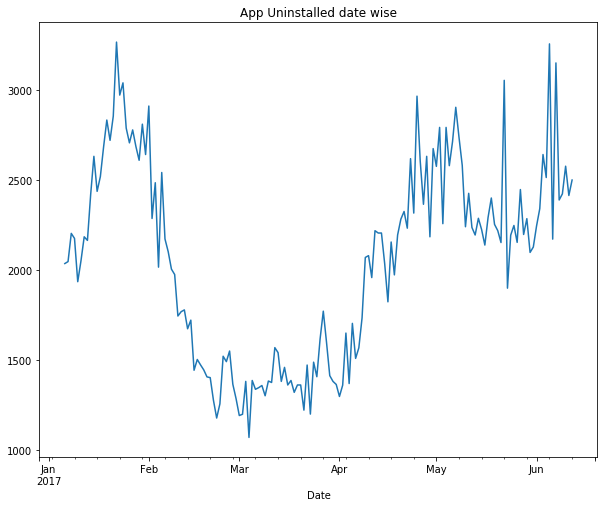

In [118]:
import datetime

appuninstalled.groupby('Date')['UserId'].nunique().plot(figsize=(10,8),title='App Uninstalled date wise')


In [121]:
applaunched[applaunched['UserId']=='04c1e14fd54a06c0d4fe98cf0cb8b04c'].head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,event_type,LaunchDate,PrevLaunch,timediff
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,2017-01-06,0,20,40,1,2,2,1,2017-01-06 00:00:20,NaT,NaN
55050,04c1e14fd54a06c0d4fe98cf0cb8b04c,2017-01-09,1187,20,40,1,2,2,1,2017-01-09 19:47:20,2017-01-06 00:00:20,19.783333
59181,04c1e14fd54a06c0d4fe98cf0cb8b04c,2017-01-10,56,12,40,1,2,2,1,2017-01-10 00:56:12,2017-01-09 19:47:20,5.147778
65835,04c1e14fd54a06c0d4fe98cf0cb8b04c,2017-01-10,898,56,40,1,2,2,1,2017-01-10 14:58:56,2017-01-10 00:56:12,14.045556


In [122]:
videostarted['ProgramType'].unique()

array([' Movies', ' TV Shows', ' Channels'], dtype=object)

In [44]:
pd.set_option('display.max_columns',200)

master_data.loc[master_data['Last_Login_Time'] == 0,'Last_Login_Time'] = data['Date'].min()
master_data['Dormant'] = (data['Date'].max() - master_data['Last_Login_Time']).dt.days > 30

master_data['Dormant'] = master_data['Dormant'].astype(int)

master_data.rename({'  ':'Other_Genre','  _video_ratio':'Other_video_ratio'},inplace=True,axis=1)

master_data.head()

,UserId,Registered_Status,No_of_Devices,No_of_Uninstalled_Device,Last_Login_Time,Last_Login_Device,Last_Login_OS,Country,State,Other_Genre,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,Badminton,Comedy,Concerts,Cooking,Crime,Current Affairs / General,Documentary,Drama,Entertainment,Entertainment News,Equestrian,Family,Fashion,Food,Football,Game Show,General,Golf,Hockey,Horror,Horror / Supernatural,Martial Sports,Motor Sports,Music,Musical / Opera,Mystery,Other Sports (General),Others,Reality,Reality Show,Religious,Romance,Series,Special Event,Sports Magazine,TV Shows (General),Talk Show,Team Sports (Excl. Football),Tennis / Squash,Thriller,Travel,Unknown,Variety,Wrestling,Channels,Movies,TV Shows,No_of_AppLaunches,No_of_UTMLaunches,q1,q2,q3,q4,No_of_Videos_Watched,Average_visit_duration,Reinstalled,Other_video_ratio,Action _video_ratio,Adventure _video_ratio,Animation _video_ratio,Anime _video_ratio,Athletics _video_ratio,Automotive _video_ratio,Award Show _video_ratio,Badminton _video_ratio,Comedy _video_ratio,Concerts _video_ratio,Cooking _video_ratio,Crime _video_ratio,Current Affairs / General _video_ratio,Documentary _video_ratio,Drama _video_ratio,Entertainment _video_ratio,Entertainment News _video_ratio,Equestrian _video_ratio,Family _video_ratio,Fashion _video_ratio,Food _video_ratio,Football _video_ratio,Game Show _video_ratio,General _video_ratio,Golf _video_ratio,Hockey _video_ratio,Horror _video_ratio,Horror / Supernatural _video_ratio,Martial Sports _video_ratio,Motor Sports _video_ratio,Music _video_ratio,Musical / Opera _video_ratio,Mystery _video_ratio,Other Sports (General) _video_ratio,Others _video_ratio,Reality _video_ratio,Reality Show _video_ratio,Religious _video_ratio,Romance _video_ratio,Series _video_ratio,Special Event _video_ratio,Sports Magazine _video_ratio,TV Shows (General) _video_ratio,Talk Show _video_ratio,Team Sports (Excl. Football) _video_ratio,Tennis / Squash _video_ratio,Thriller _video_ratio,Travel _video_ratio,Unknown _video_ratio,Variety _video_ratio,Wrestling _video_ratio,Dormant
0,a27134c322d4f56dabc106a6847cb96b,N,1.0,0.0,2017-01-06,1.0,2.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,342.0,0.0,0.0,0.0,1.0,0.0,1.0,0.040189,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
1,aab39ad0874c59cc388525d511667f9d,N,1.0,0.0,2017-03-01,1.0,2.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,11.173333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000727,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
2,f717dc3f757dc18cc0c3f27ed3e94ef8,N,2.0,2.0,2017-06-11,2.0,2.0,1.0,35.0,28.0,6.0,0.0,0.0,11.0,0.0,0.0,0.0,25.0,2.0,0.0,0.0,0.0,3.0,0.0,34.0,3.0,0.0,0.0,0.0,4.0,6.0,53.0,0.0,1.0,0.0,0.0,4.0,3.0,6.0,50.0,0.0,0.0,0.0,18.0,0.0,0.0,4.0,0.0,3.0,2.0,1.0,113.0,9.0,0.0,0.0,24.0,1.0,0.0,0.0,0.0,0.0,395.0,8.0,11.0,106.0,0.0,13.0,53.0,28.0,320.0,414.0,7.994159,1.0,1.0,0.026316,0.0,0.0,0.011254,0.0,0.0,0.0,0.333333,0.004464,0.0,0.0,0.0,0.5,0.0,0.006541,0.066667,0.0,0.0,0.0,0.25,0.5,1.0,0.0,0.5,0.0,0.0,0.028169,1.0,1.5,0.5,0.0,0.0,0.0,1.333333,0.0,0.0,0.028037,0.0,0.010526,0.5,0.5,0.6,0.6,0.0,0.0,0.333333,0.033333,0.0,0.0,0.0,0.0,0
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,N,1.0,0.0,2017-01-10,2.0,2.0,1.0,40.0,0.0,0.0,

In [ ]:
master_data.to_csv('C:/Users/juned/Desktop/Juned/GreyAtom/capstone project/Clever_Tap_Master_Data.csv')